In [1]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly as plty

In [2]:
df=pd.read_csv('loan_train.csv')

In [3]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [4]:
df['Principal'].unique()

array([1000,  800,  300,  900,  500], dtype=int64)

<IPython.core.display.Javascript object>


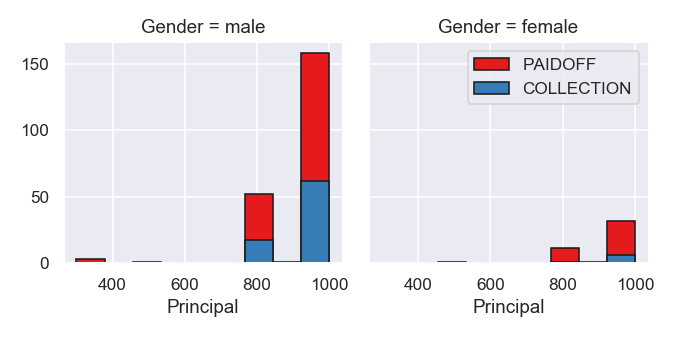

In [5]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df,col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])

<IPython.core.display.Javascript object>


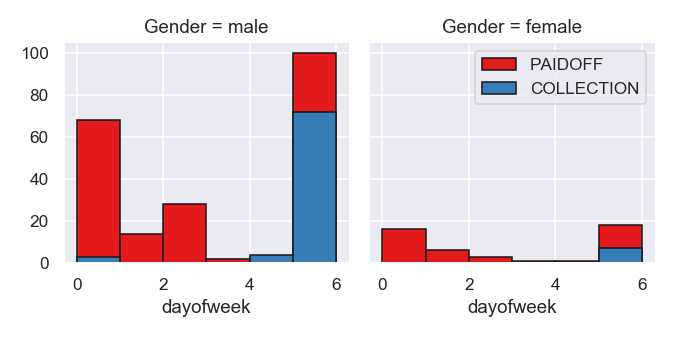

In [7]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins=np.linspace(df.dayofweek.min(), df.dayofweek.max(), 7)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [8]:
df['weekend']= df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [9]:
df['loan_month']=pd.DatetimeIndex(df['effective_date']).year

In [10]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,loan_month
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0,2016
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0,2016
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0,2016
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1,2016
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1,2016


In [13]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,loan_month
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0,2016
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0,2016
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0,2016
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1,2016
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1,2016


# One hot encoding

In [11]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [12]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()



,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [13]:
X=Feature
y = (df['loan_status'].values=='PAIDOFF').astype(int)

In [17]:
X.shape

(346, 8)

## SPLITTING

In [14]:
y.shape

(346,)

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(np.asarray(X),y, random_state=1,stratify=y)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(259, 8)
(87, 8)
(259,)
(87,)


### Standardizing

In [26]:
from sklearn.preprocessing import StandardScaler
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)


In [27]:
X_train=X_train.T

In [28]:
X_test=X_test.T

### Neural network

####  Creating a two layered neural network
- Linear -> ReLU -> Linear ->Sigmoid

In [20]:
def initialize_parameters(n_x,n_h,n_y):
    
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    
    parameters={'W1':W1,'b1':b1,'W2':W2,'b2':b2}
    
    return parameters
        

    

In [21]:
params=initialize_parameters(8,10,1)

In [22]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def ReLU(X):
    return np.maximum(X,0)

In [23]:
def forward_propagation(X,parameters):
     #number of examples
    params=initialize_parameters(8,10,1)
    W1=params['W1']
    b1=params['b1']
    W2=params['W2']
    b2=params['b2']
    
    Z1=np.dot(W1,X)+b1
    A1=ReLU(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)
    
    cache={'Z1':Z1,'Z2':Z2,'A1':A1,'A2':A2}
    
    return cache,A2

    

    

In [151]:
def compute_loss(y,y_hat,m):
    '''
    args
    y=true label
    y_hat=prediction
    m=no of samples
    '''
    loss=(-1/m)*np.sum(np.multiply(y,np.log(y_hat))+np.multiply((1-y),np.log(1-y_hat)))
    loss=np.squeeze(loss)
    return loss

In [180]:
def relu_backward(a):
    derivative = a>0
    return np.squeeze(derivative.astype(int))

In [177]:
a=np.random.randn(1,5)

In [179]:
a

array([[-0.13694217,  0.68043654,  1.02251088,  0.13002056,  0.59882387]])

In [181]:
print(relu_backward(a))

[0 1 1 1 1]


In [223]:
def backward_propagation(X,m,cache,params,y):
    '''
    args
    X=inputs
    m=no of examples
    cache= cache from forward prop
    parameters= w1,w2,b1,b2
    '''
    W1=params['W1']
    b1=params['b1']
    W2=params['W2']
    b2=params['b2']
    
    A2=cache['A2']
    A1=cache['A1']
    Z2=cache['Z2']
    Z1=cache['Z1']
    
    dz2 = A2-y
    dw2=(1/m)*np.dot(dz2,A1.T)
    db2 = (1/m)*np.sum(dz2,axis=1,keepdims=True)
    dz1=np.dot(W2.T,dz2)*relu_backward(Z1)
    dw1=(1/m)*np.dot(dz1,X.T)
    db1 = (1/m)*np.sum(dz1,axis=1,keepdims=True)
    
    grads={'dw1':dw1,'dw2':dw2,"db1":db1,"db2":db2}
    
    return grads
    
    
    

In [229]:
def update_parameters(grads,params,learning_rate):
    ''''''
    
    W1=params['W1']
    b1=params['b1']
    W2=params['W2']
    b2=params['b2']
    
    dw1=grads['dw1']
    dw2=grads['dw2']
    db1=grads['db1']
    db2=grads['db2']
    
    params['W1']=params['W1']-learning_rate*dw1
    params['W2']=params['W2']-learning_rate*dw2
    params['b1']=params['b1']-learning_rate*db1
    params['b2']=params['b2']-learning_rate*db2
    
    return params
    
    

In [236]:
def network(X,Y,epochs):
    m=X.shape[1]
    params=initialize_parameters(8,10,1)
    for i in range(epochs):
        cache,A2=forward_propagation(X,params)
        cost=compute_loss(Y,A2,m)
        grads=backward_propagation(X,m,cache,params,Y)
        params=update_parameters(grads,params,learning_rate=1)
        print ("Cost after iteration %i: %f" %(i, cost))
    
    return params
    

In [237]:
params=network(X_train,y_train,10000)

Cost after iteration 0: -0.693331
Cost after iteration 1: -0.693029
Cost after iteration 2: -0.693232
Cost after iteration 3: -0.692944
Cost after iteration 4: -0.693090
Cost after iteration 5: -0.692982
Cost after iteration 6: -0.693001
Cost after iteration 7: -0.692999
Cost after iteration 8: -0.693116
Cost after iteration 9: -0.693160
Cost after iteration 10: -0.693193
Cost after iteration 11: -0.693134
Cost after iteration 12: -0.693264
Cost after iteration 13: -0.693081
Cost after iteration 14: -0.692871
Cost after iteration 15: -0.693168
Cost after iteration 16: -0.693151
Cost after iteration 17: -0.693368
Cost after iteration 18: -0.693104
Cost after iteration 19: -0.693041
Cost after iteration 20: -0.693303
Cost after iteration 21: -0.693129
Cost after iteration 22: -0.693126
Cost after iteration 23: -0.692998
Cost after iteration 24: -0.693260
Cost after iteration 25: -0.693139
Cost after iteration 26: -0.693377
Cost after iteration 27: -0.693077
Cost after iteration 28: -0.69

Cost after iteration 317: -0.693073
Cost after iteration 318: -0.693084
Cost after iteration 319: -0.693243
Cost after iteration 320: -0.693239
Cost after iteration 321: -0.693033
Cost after iteration 322: -0.693145
Cost after iteration 323: -0.693231
Cost after iteration 324: -0.693174
Cost after iteration 325: -0.693200
Cost after iteration 326: -0.693268
Cost after iteration 327: -0.693160
Cost after iteration 328: -0.693282
Cost after iteration 329: -0.693172
Cost after iteration 330: -0.693231
Cost after iteration 331: -0.693015
Cost after iteration 332: -0.693141
Cost after iteration 333: -0.693219
Cost after iteration 334: -0.693276
Cost after iteration 335: -0.693057
Cost after iteration 336: -0.693060
Cost after iteration 337: -0.693158
Cost after iteration 338: -0.693105
Cost after iteration 339: -0.693314
Cost after iteration 340: -0.693186
Cost after iteration 341: -0.693036
Cost after iteration 342: -0.693074
Cost after iteration 343: -0.693121
Cost after iteration 344: -0

Cost after iteration 660: -0.693134
Cost after iteration 661: -0.693045
Cost after iteration 662: -0.693011
Cost after iteration 663: -0.693103
Cost after iteration 664: -0.693123
Cost after iteration 665: -0.693132
Cost after iteration 666: -0.693234
Cost after iteration 667: -0.693158
Cost after iteration 668: -0.693326
Cost after iteration 669: -0.693202
Cost after iteration 670: -0.693220
Cost after iteration 671: -0.693201
Cost after iteration 672: -0.693185
Cost after iteration 673: -0.693365
Cost after iteration 674: -0.693048
Cost after iteration 675: -0.693161
Cost after iteration 676: -0.693287
Cost after iteration 677: -0.692961
Cost after iteration 678: -0.693203
Cost after iteration 679: -0.693370
Cost after iteration 680: -0.693199
Cost after iteration 681: -0.693134
Cost after iteration 682: -0.693101
Cost after iteration 683: -0.693005
Cost after iteration 684: -0.693034
Cost after iteration 685: -0.693136
Cost after iteration 686: -0.693097
Cost after iteration 687: -0

Cost after iteration 1040: -0.693142
Cost after iteration 1041: -0.693114
Cost after iteration 1042: -0.693179
Cost after iteration 1043: -0.693151
Cost after iteration 1044: -0.693108
Cost after iteration 1045: -0.693163
Cost after iteration 1046: -0.692893
Cost after iteration 1047: -0.693234
Cost after iteration 1048: -0.693156
Cost after iteration 1049: -0.693224
Cost after iteration 1050: -0.693306
Cost after iteration 1051: -0.693281
Cost after iteration 1052: -0.693081
Cost after iteration 1053: -0.692981
Cost after iteration 1054: -0.693214
Cost after iteration 1055: -0.693201
Cost after iteration 1056: -0.693221
Cost after iteration 1057: -0.693296
Cost after iteration 1058: -0.693326
Cost after iteration 1059: -0.692929
Cost after iteration 1060: -0.693163
Cost after iteration 1061: -0.693058
Cost after iteration 1062: -0.692998
Cost after iteration 1063: -0.693183
Cost after iteration 1064: -0.693180
Cost after iteration 1065: -0.693218
Cost after iteration 1066: -0.693241
C

Cost after iteration 1386: -0.693314
Cost after iteration 1387: -0.693282
Cost after iteration 1388: -0.693187
Cost after iteration 1389: -0.693198
Cost after iteration 1390: -0.693156
Cost after iteration 1391: -0.693138
Cost after iteration 1392: -0.693014
Cost after iteration 1393: -0.693063
Cost after iteration 1394: -0.693234
Cost after iteration 1395: -0.693233
Cost after iteration 1396: -0.693111
Cost after iteration 1397: -0.692995
Cost after iteration 1398: -0.693067
Cost after iteration 1399: -0.693068
Cost after iteration 1400: -0.693165
Cost after iteration 1401: -0.693288
Cost after iteration 1402: -0.693073
Cost after iteration 1403: -0.692960
Cost after iteration 1404: -0.693222
Cost after iteration 1405: -0.693096
Cost after iteration 1406: -0.693300
Cost after iteration 1407: -0.693150
Cost after iteration 1408: -0.693193
Cost after iteration 1409: -0.693230
Cost after iteration 1410: -0.693114
Cost after iteration 1411: -0.693114
Cost after iteration 1412: -0.693293
C

Cost after iteration 1735: -0.693060
Cost after iteration 1736: -0.693259
Cost after iteration 1737: -0.693112
Cost after iteration 1738: -0.693071
Cost after iteration 1739: -0.693154
Cost after iteration 1740: -0.693000
Cost after iteration 1741: -0.693217
Cost after iteration 1742: -0.693169
Cost after iteration 1743: -0.693169
Cost after iteration 1744: -0.693027
Cost after iteration 1745: -0.692994
Cost after iteration 1746: -0.693343
Cost after iteration 1747: -0.692956
Cost after iteration 1748: -0.693024
Cost after iteration 1749: -0.693246
Cost after iteration 1750: -0.693295
Cost after iteration 1751: -0.693198
Cost after iteration 1752: -0.692951
Cost after iteration 1753: -0.693252
Cost after iteration 1754: -0.693232
Cost after iteration 1755: -0.693154
Cost after iteration 1756: -0.693173
Cost after iteration 1757: -0.693166
Cost after iteration 1758: -0.692960
Cost after iteration 1759: -0.693205
Cost after iteration 1760: -0.693114
Cost after iteration 1761: -0.693277
C

Cost after iteration 2019: -0.693057
Cost after iteration 2020: -0.692978
Cost after iteration 2021: -0.693154
Cost after iteration 2022: -0.693045
Cost after iteration 2023: -0.693049
Cost after iteration 2024: -0.693111
Cost after iteration 2025: -0.693042
Cost after iteration 2026: -0.693178
Cost after iteration 2027: -0.693203
Cost after iteration 2028: -0.693081
Cost after iteration 2029: -0.693128
Cost after iteration 2030: -0.693045
Cost after iteration 2031: -0.693121
Cost after iteration 2032: -0.693232
Cost after iteration 2033: -0.693131
Cost after iteration 2034: -0.693075
Cost after iteration 2035: -0.693145
Cost after iteration 2036: -0.693191
Cost after iteration 2037: -0.693246
Cost after iteration 2038: -0.693051
Cost after iteration 2039: -0.693158
Cost after iteration 2040: -0.693011
Cost after iteration 2041: -0.693194
Cost after iteration 2042: -0.692802
Cost after iteration 2043: -0.692950
Cost after iteration 2044: -0.693216
Cost after iteration 2045: -0.693057
C

Cost after iteration 2281: -0.693078
Cost after iteration 2282: -0.693007
Cost after iteration 2283: -0.693047
Cost after iteration 2284: -0.693164
Cost after iteration 2285: -0.693192
Cost after iteration 2286: -0.693304
Cost after iteration 2287: -0.693205
Cost after iteration 2288: -0.693118
Cost after iteration 2289: -0.693184
Cost after iteration 2290: -0.693095
Cost after iteration 2291: -0.692863
Cost after iteration 2292: -0.693034
Cost after iteration 2293: -0.693039
Cost after iteration 2294: -0.693160
Cost after iteration 2295: -0.693077
Cost after iteration 2296: -0.692981
Cost after iteration 2297: -0.693438
Cost after iteration 2298: -0.693047
Cost after iteration 2299: -0.692952
Cost after iteration 2300: -0.693087
Cost after iteration 2301: -0.693346
Cost after iteration 2302: -0.692941
Cost after iteration 2303: -0.693049
Cost after iteration 2304: -0.693216
Cost after iteration 2305: -0.693155
Cost after iteration 2306: -0.693287
Cost after iteration 2307: -0.693147
C

Cost after iteration 2539: -0.693221
Cost after iteration 2540: -0.693180
Cost after iteration 2541: -0.693059
Cost after iteration 2542: -0.693232
Cost after iteration 2543: -0.693007
Cost after iteration 2544: -0.693257
Cost after iteration 2545: -0.693211
Cost after iteration 2546: -0.693195
Cost after iteration 2547: -0.693163
Cost after iteration 2548: -0.693289
Cost after iteration 2549: -0.693135
Cost after iteration 2550: -0.693307
Cost after iteration 2551: -0.693325
Cost after iteration 2552: -0.693186
Cost after iteration 2553: -0.693071
Cost after iteration 2554: -0.693024
Cost after iteration 2555: -0.693540
Cost after iteration 2556: -0.693115
Cost after iteration 2557: -0.693212
Cost after iteration 2558: -0.693095
Cost after iteration 2559: -0.693275
Cost after iteration 2560: -0.693200
Cost after iteration 2561: -0.693010
Cost after iteration 2562: -0.692983
Cost after iteration 2563: -0.693193
Cost after iteration 2564: -0.693107
Cost after iteration 2565: -0.693203
C

Cost after iteration 2809: -0.693173
Cost after iteration 2810: -0.693095
Cost after iteration 2811: -0.693208
Cost after iteration 2812: -0.693125
Cost after iteration 2813: -0.693139
Cost after iteration 2814: -0.693223
Cost after iteration 2815: -0.693076
Cost after iteration 2816: -0.693300
Cost after iteration 2817: -0.693083
Cost after iteration 2818: -0.693261
Cost after iteration 2819: -0.693080
Cost after iteration 2820: -0.693254
Cost after iteration 2821: -0.693271
Cost after iteration 2822: -0.693035
Cost after iteration 2823: -0.693077
Cost after iteration 2824: -0.693137
Cost after iteration 2825: -0.693151
Cost after iteration 2826: -0.693023
Cost after iteration 2827: -0.693311
Cost after iteration 2828: -0.692943
Cost after iteration 2829: -0.693185
Cost after iteration 2830: -0.693062
Cost after iteration 2831: -0.693080
Cost after iteration 2832: -0.693101
Cost after iteration 2833: -0.693111
Cost after iteration 2834: -0.693232
Cost after iteration 2835: -0.693035
C

Cost after iteration 3090: -0.693082
Cost after iteration 3091: -0.693135
Cost after iteration 3092: -0.693062
Cost after iteration 3093: -0.693180
Cost after iteration 3094: -0.693250
Cost after iteration 3095: -0.692972
Cost after iteration 3096: -0.693157
Cost after iteration 3097: -0.693070
Cost after iteration 3098: -0.693241
Cost after iteration 3099: -0.693109
Cost after iteration 3100: -0.693122
Cost after iteration 3101: -0.693100
Cost after iteration 3102: -0.693115
Cost after iteration 3103: -0.693017
Cost after iteration 3104: -0.693207
Cost after iteration 3105: -0.693107
Cost after iteration 3106: -0.693215
Cost after iteration 3107: -0.693175
Cost after iteration 3108: -0.693196
Cost after iteration 3109: -0.693202
Cost after iteration 3110: -0.692920
Cost after iteration 3111: -0.693031
Cost after iteration 3112: -0.693048
Cost after iteration 3113: -0.693268
Cost after iteration 3114: -0.693092
Cost after iteration 3115: -0.693213
Cost after iteration 3116: -0.693047
C

Cost after iteration 3336: -0.693007
Cost after iteration 3337: -0.693235
Cost after iteration 3338: -0.693037
Cost after iteration 3339: -0.693280
Cost after iteration 3340: -0.693113
Cost after iteration 3341: -0.693150
Cost after iteration 3342: -0.693192
Cost after iteration 3343: -0.693285
Cost after iteration 3344: -0.692995
Cost after iteration 3345: -0.693265
Cost after iteration 3346: -0.693274
Cost after iteration 3347: -0.693108
Cost after iteration 3348: -0.693219
Cost after iteration 3349: -0.693116
Cost after iteration 3350: -0.693080
Cost after iteration 3351: -0.693258
Cost after iteration 3352: -0.693036
Cost after iteration 3353: -0.693393
Cost after iteration 3354: -0.693172
Cost after iteration 3355: -0.693117
Cost after iteration 3356: -0.693313
Cost after iteration 3357: -0.693120
Cost after iteration 3358: -0.693109
Cost after iteration 3359: -0.693026
Cost after iteration 3360: -0.693157
Cost after iteration 3361: -0.693200
Cost after iteration 3362: -0.693281
C

Cost after iteration 3621: -0.693243
Cost after iteration 3622: -0.693147
Cost after iteration 3623: -0.693167
Cost after iteration 3624: -0.693238
Cost after iteration 3625: -0.693302
Cost after iteration 3626: -0.693234
Cost after iteration 3627: -0.693176
Cost after iteration 3628: -0.692979
Cost after iteration 3629: -0.693202
Cost after iteration 3630: -0.693259
Cost after iteration 3631: -0.693207
Cost after iteration 3632: -0.693207
Cost after iteration 3633: -0.693086
Cost after iteration 3634: -0.693269
Cost after iteration 3635: -0.693114
Cost after iteration 3636: -0.693132
Cost after iteration 3637: -0.693127
Cost after iteration 3638: -0.693186
Cost after iteration 3639: -0.693045
Cost after iteration 3640: -0.693200
Cost after iteration 3641: -0.693266
Cost after iteration 3642: -0.693302
Cost after iteration 3643: -0.693169
Cost after iteration 3644: -0.693207
Cost after iteration 3645: -0.693167
Cost after iteration 3646: -0.693135
Cost after iteration 3647: -0.693131
C

Cost after iteration 3908: -0.692997
Cost after iteration 3909: -0.693144
Cost after iteration 3910: -0.692995
Cost after iteration 3911: -0.693007
Cost after iteration 3912: -0.693059
Cost after iteration 3913: -0.693049
Cost after iteration 3914: -0.693036
Cost after iteration 3915: -0.693108
Cost after iteration 3916: -0.692970
Cost after iteration 3917: -0.693184
Cost after iteration 3918: -0.693216
Cost after iteration 3919: -0.693282
Cost after iteration 3920: -0.693268
Cost after iteration 3921: -0.692988
Cost after iteration 3922: -0.693272
Cost after iteration 3923: -0.693120
Cost after iteration 3924: -0.693009
Cost after iteration 3925: -0.693356
Cost after iteration 3926: -0.693399
Cost after iteration 3927: -0.693072
Cost after iteration 3928: -0.693093
Cost after iteration 3929: -0.693438
Cost after iteration 3930: -0.693189
Cost after iteration 3931: -0.693215
Cost after iteration 3932: -0.693162
Cost after iteration 3933: -0.693243
Cost after iteration 3934: -0.693084
C

Cost after iteration 4198: -0.693296
Cost after iteration 4199: -0.693125
Cost after iteration 4200: -0.693247
Cost after iteration 4201: -0.693166
Cost after iteration 4202: -0.692945
Cost after iteration 4203: -0.693041
Cost after iteration 4204: -0.693358
Cost after iteration 4205: -0.693004
Cost after iteration 4206: -0.693155
Cost after iteration 4207: -0.693092
Cost after iteration 4208: -0.693105
Cost after iteration 4209: -0.693198
Cost after iteration 4210: -0.693088
Cost after iteration 4211: -0.693141
Cost after iteration 4212: -0.693055
Cost after iteration 4213: -0.693206
Cost after iteration 4214: -0.693112
Cost after iteration 4215: -0.693172
Cost after iteration 4216: -0.693142
Cost after iteration 4217: -0.693365
Cost after iteration 4218: -0.693159
Cost after iteration 4219: -0.693096
Cost after iteration 4220: -0.693324
Cost after iteration 4221: -0.693161
Cost after iteration 4222: -0.693139
Cost after iteration 4223: -0.692971
Cost after iteration 4224: -0.693012
C

Cost after iteration 4484: -0.693069
Cost after iteration 4485: -0.693153
Cost after iteration 4486: -0.693233
Cost after iteration 4487: -0.693246
Cost after iteration 4488: -0.693175
Cost after iteration 4489: -0.693098
Cost after iteration 4490: -0.692983
Cost after iteration 4491: -0.693310
Cost after iteration 4492: -0.693205
Cost after iteration 4493: -0.692988
Cost after iteration 4494: -0.693143
Cost after iteration 4495: -0.693071
Cost after iteration 4496: -0.693211
Cost after iteration 4497: -0.693318
Cost after iteration 4498: -0.693106
Cost after iteration 4499: -0.693209
Cost after iteration 4500: -0.693156
Cost after iteration 4501: -0.693041
Cost after iteration 4502: -0.693150
Cost after iteration 4503: -0.693028
Cost after iteration 4504: -0.693191
Cost after iteration 4505: -0.693124
Cost after iteration 4506: -0.693154
Cost after iteration 4507: -0.693041
Cost after iteration 4508: -0.693183
Cost after iteration 4509: -0.693299
Cost after iteration 4510: -0.693054
C

Cost after iteration 4770: -0.693258
Cost after iteration 4771: -0.693026
Cost after iteration 4772: -0.693245
Cost after iteration 4773: -0.693318
Cost after iteration 4774: -0.693117
Cost after iteration 4775: -0.693040
Cost after iteration 4776: -0.693075
Cost after iteration 4777: -0.693167
Cost after iteration 4778: -0.693047
Cost after iteration 4779: -0.693018
Cost after iteration 4780: -0.692843
Cost after iteration 4781: -0.693084
Cost after iteration 4782: -0.692971
Cost after iteration 4783: -0.693153
Cost after iteration 4784: -0.693197
Cost after iteration 4785: -0.693083
Cost after iteration 4786: -0.693016
Cost after iteration 4787: -0.693080
Cost after iteration 4788: -0.693250
Cost after iteration 4789: -0.693095
Cost after iteration 4790: -0.693245
Cost after iteration 4791: -0.693229
Cost after iteration 4792: -0.693157
Cost after iteration 4793: -0.693107
Cost after iteration 4794: -0.693360
Cost after iteration 4795: -0.693101
Cost after iteration 4796: -0.693162
C

Cost after iteration 5161: -0.693046
Cost after iteration 5162: -0.693135
Cost after iteration 5163: -0.693228
Cost after iteration 5164: -0.693114
Cost after iteration 5165: -0.693147
Cost after iteration 5166: -0.693158
Cost after iteration 5167: -0.693206
Cost after iteration 5168: -0.692968
Cost after iteration 5169: -0.693327
Cost after iteration 5170: -0.693223
Cost after iteration 5171: -0.692981
Cost after iteration 5172: -0.693212
Cost after iteration 5173: -0.693136
Cost after iteration 5174: -0.693231
Cost after iteration 5175: -0.693198
Cost after iteration 5176: -0.693054
Cost after iteration 5177: -0.693120
Cost after iteration 5178: -0.693117
Cost after iteration 5179: -0.693127
Cost after iteration 5180: -0.693302
Cost after iteration 5181: -0.693224
Cost after iteration 5182: -0.693227
Cost after iteration 5183: -0.693338
Cost after iteration 5184: -0.693130
Cost after iteration 5185: -0.693115
Cost after iteration 5186: -0.693263
Cost after iteration 5187: -0.693338
C

Cost after iteration 5463: -0.693254
Cost after iteration 5464: -0.693202
Cost after iteration 5465: -0.692986
Cost after iteration 5466: -0.693043
Cost after iteration 5467: -0.693174
Cost after iteration 5468: -0.693104
Cost after iteration 5469: -0.693298
Cost after iteration 5470: -0.693293
Cost after iteration 5471: -0.693130
Cost after iteration 5472: -0.693157
Cost after iteration 5473: -0.693071
Cost after iteration 5474: -0.693216
Cost after iteration 5475: -0.693015
Cost after iteration 5476: -0.693105
Cost after iteration 5477: -0.693258
Cost after iteration 5478: -0.693119
Cost after iteration 5479: -0.693125
Cost after iteration 5480: -0.692823
Cost after iteration 5481: -0.693297
Cost after iteration 5482: -0.693303
Cost after iteration 5483: -0.693036
Cost after iteration 5484: -0.693225
Cost after iteration 5485: -0.693075
Cost after iteration 5486: -0.693196
Cost after iteration 5487: -0.692995
Cost after iteration 5488: -0.693168
Cost after iteration 5489: -0.693092
C

Cost after iteration 5779: -0.693090
Cost after iteration 5780: -0.693145
Cost after iteration 5781: -0.693050
Cost after iteration 5782: -0.693160
Cost after iteration 5783: -0.693321
Cost after iteration 5784: -0.693207
Cost after iteration 5785: -0.693129
Cost after iteration 5786: -0.693139
Cost after iteration 5787: -0.693204
Cost after iteration 5788: -0.693212
Cost after iteration 5789: -0.693122
Cost after iteration 5790: -0.693040
Cost after iteration 5791: -0.693215
Cost after iteration 5792: -0.693200
Cost after iteration 5793: -0.693298
Cost after iteration 5794: -0.693101
Cost after iteration 5795: -0.693261
Cost after iteration 5796: -0.693016
Cost after iteration 5797: -0.693047
Cost after iteration 5798: -0.693239
Cost after iteration 5799: -0.693215
Cost after iteration 5800: -0.693092
Cost after iteration 5801: -0.693167
Cost after iteration 5802: -0.693172
Cost after iteration 5803: -0.693309
Cost after iteration 5804: -0.693190
Cost after iteration 5805: -0.693137
C

Cost after iteration 6154: -0.693053
Cost after iteration 6155: -0.693084
Cost after iteration 6156: -0.693126
Cost after iteration 6157: -0.693219
Cost after iteration 6158: -0.693271
Cost after iteration 6159: -0.693166
Cost after iteration 6160: -0.693151
Cost after iteration 6161: -0.693182
Cost after iteration 6162: -0.693247
Cost after iteration 6163: -0.693254
Cost after iteration 6164: -0.693083
Cost after iteration 6165: -0.692989
Cost after iteration 6166: -0.693051
Cost after iteration 6167: -0.693010
Cost after iteration 6168: -0.693041
Cost after iteration 6169: -0.693155
Cost after iteration 6170: -0.693122
Cost after iteration 6171: -0.693185
Cost after iteration 6172: -0.693203
Cost after iteration 6173: -0.693044
Cost after iteration 6174: -0.693084
Cost after iteration 6175: -0.693237
Cost after iteration 6176: -0.693271
Cost after iteration 6177: -0.693235
Cost after iteration 6178: -0.693050
Cost after iteration 6179: -0.693109
Cost after iteration 6180: -0.693181
C

Cost after iteration 6434: -0.693153
Cost after iteration 6435: -0.692881
Cost after iteration 6436: -0.693033
Cost after iteration 6437: -0.693296
Cost after iteration 6438: -0.693191
Cost after iteration 6439: -0.693096
Cost after iteration 6440: -0.693189
Cost after iteration 6441: -0.693242
Cost after iteration 6442: -0.693286
Cost after iteration 6443: -0.693209
Cost after iteration 6444: -0.693081
Cost after iteration 6445: -0.693126
Cost after iteration 6446: -0.693270
Cost after iteration 6447: -0.693242
Cost after iteration 6448: -0.693182
Cost after iteration 6449: -0.693093
Cost after iteration 6450: -0.693138
Cost after iteration 6451: -0.693239
Cost after iteration 6452: -0.693144
Cost after iteration 6453: -0.693175
Cost after iteration 6454: -0.693186
Cost after iteration 6455: -0.693174
Cost after iteration 6456: -0.693156
Cost after iteration 6457: -0.693079
Cost after iteration 6458: -0.693142
Cost after iteration 6459: -0.693091
Cost after iteration 6460: -0.693066
C

Cost after iteration 6744: -0.693144
Cost after iteration 6745: -0.693116
Cost after iteration 6746: -0.693277
Cost after iteration 6747: -0.693064
Cost after iteration 6748: -0.693122
Cost after iteration 6749: -0.693232
Cost after iteration 6750: -0.693071
Cost after iteration 6751: -0.693146
Cost after iteration 6752: -0.693124
Cost after iteration 6753: -0.693313
Cost after iteration 6754: -0.693125
Cost after iteration 6755: -0.693084
Cost after iteration 6756: -0.693219
Cost after iteration 6757: -0.693286
Cost after iteration 6758: -0.693189
Cost after iteration 6759: -0.692979
Cost after iteration 6760: -0.692919
Cost after iteration 6761: -0.693205
Cost after iteration 6762: -0.693166
Cost after iteration 6763: -0.693125
Cost after iteration 6764: -0.693121
Cost after iteration 6765: -0.693185
Cost after iteration 6766: -0.693107
Cost after iteration 6767: -0.692879
Cost after iteration 6768: -0.693249
Cost after iteration 6769: -0.693172
Cost after iteration 6770: -0.693261
C

Cost after iteration 7057: -0.693053
Cost after iteration 7058: -0.693044
Cost after iteration 7059: -0.692987
Cost after iteration 7060: -0.692841
Cost after iteration 7061: -0.693053
Cost after iteration 7062: -0.693127
Cost after iteration 7063: -0.692957
Cost after iteration 7064: -0.693146
Cost after iteration 7065: -0.693045
Cost after iteration 7066: -0.693084
Cost after iteration 7067: -0.693039
Cost after iteration 7068: -0.692998
Cost after iteration 7069: -0.693182
Cost after iteration 7070: -0.693174
Cost after iteration 7071: -0.693159
Cost after iteration 7072: -0.693074
Cost after iteration 7073: -0.692896
Cost after iteration 7074: -0.693201
Cost after iteration 7075: -0.693101
Cost after iteration 7076: -0.693062
Cost after iteration 7077: -0.693164
Cost after iteration 7078: -0.693151
Cost after iteration 7079: -0.692933
Cost after iteration 7080: -0.693165
Cost after iteration 7081: -0.693106
Cost after iteration 7082: -0.693201
Cost after iteration 7083: -0.693110
C

Cost after iteration 7425: -0.693036
Cost after iteration 7426: -0.693145
Cost after iteration 7427: -0.693107
Cost after iteration 7428: -0.693116
Cost after iteration 7429: -0.693009
Cost after iteration 7430: -0.693173
Cost after iteration 7431: -0.693224
Cost after iteration 7432: -0.693229
Cost after iteration 7433: -0.693059
Cost after iteration 7434: -0.693085
Cost after iteration 7435: -0.693182
Cost after iteration 7436: -0.693212
Cost after iteration 7437: -0.693078
Cost after iteration 7438: -0.693181
Cost after iteration 7439: -0.693183
Cost after iteration 7440: -0.693086
Cost after iteration 7441: -0.693259
Cost after iteration 7442: -0.693208
Cost after iteration 7443: -0.693114
Cost after iteration 7444: -0.693147
Cost after iteration 7445: -0.693245
Cost after iteration 7446: -0.693088
Cost after iteration 7447: -0.693100
Cost after iteration 7448: -0.693028
Cost after iteration 7449: -0.693034
Cost after iteration 7450: -0.693168
Cost after iteration 7451: -0.693019
C

Cost after iteration 7743: -0.693197
Cost after iteration 7744: -0.693238
Cost after iteration 7745: -0.693080
Cost after iteration 7746: -0.693288
Cost after iteration 7747: -0.693067
Cost after iteration 7748: -0.693185
Cost after iteration 7749: -0.693201
Cost after iteration 7750: -0.693125
Cost after iteration 7751: -0.693183
Cost after iteration 7752: -0.693330
Cost after iteration 7753: -0.693134
Cost after iteration 7754: -0.693275
Cost after iteration 7755: -0.693095
Cost after iteration 7756: -0.693119
Cost after iteration 7757: -0.693316
Cost after iteration 7758: -0.693222
Cost after iteration 7759: -0.693328
Cost after iteration 7760: -0.693150
Cost after iteration 7761: -0.693261
Cost after iteration 7762: -0.693229
Cost after iteration 7763: -0.693115
Cost after iteration 7764: -0.693087
Cost after iteration 7765: -0.692984
Cost after iteration 7766: -0.693039
Cost after iteration 7767: -0.693511
Cost after iteration 7768: -0.693167
Cost after iteration 7769: -0.693394
C

Cost after iteration 8096: -0.692869
Cost after iteration 8097: -0.693102
Cost after iteration 8098: -0.693150
Cost after iteration 8099: -0.693149
Cost after iteration 8100: -0.693192
Cost after iteration 8101: -0.693150
Cost after iteration 8102: -0.693116
Cost after iteration 8103: -0.693026
Cost after iteration 8104: -0.693145
Cost after iteration 8105: -0.693115
Cost after iteration 8106: -0.693210
Cost after iteration 8107: -0.693103
Cost after iteration 8108: -0.693067
Cost after iteration 8109: -0.693136
Cost after iteration 8110: -0.693082
Cost after iteration 8111: -0.693049
Cost after iteration 8112: -0.693029
Cost after iteration 8113: -0.693221
Cost after iteration 8114: -0.693222
Cost after iteration 8115: -0.693225
Cost after iteration 8116: -0.693062
Cost after iteration 8117: -0.693055
Cost after iteration 8118: -0.693161
Cost after iteration 8119: -0.693116
Cost after iteration 8120: -0.693088
Cost after iteration 8121: -0.692910
Cost after iteration 8122: -0.693081
C

Cost after iteration 8441: -0.692945
Cost after iteration 8442: -0.693260
Cost after iteration 8443: -0.693192
Cost after iteration 8444: -0.693062
Cost after iteration 8445: -0.693204
Cost after iteration 8446: -0.693194
Cost after iteration 8447: -0.693087
Cost after iteration 8448: -0.693247
Cost after iteration 8449: -0.693256
Cost after iteration 8450: -0.693097
Cost after iteration 8451: -0.693064
Cost after iteration 8452: -0.693159
Cost after iteration 8453: -0.693172
Cost after iteration 8454: -0.693211
Cost after iteration 8455: -0.693246
Cost after iteration 8456: -0.693223
Cost after iteration 8457: -0.693139
Cost after iteration 8458: -0.692967
Cost after iteration 8459: -0.693022
Cost after iteration 8460: -0.693177
Cost after iteration 8461: -0.693123
Cost after iteration 8462: -0.693032
Cost after iteration 8463: -0.693110
Cost after iteration 8464: -0.693147
Cost after iteration 8465: -0.693177
Cost after iteration 8466: -0.693121
Cost after iteration 8467: -0.693206
C

Cost after iteration 8734: -0.693105
Cost after iteration 8735: -0.692911
Cost after iteration 8736: -0.693315
Cost after iteration 8737: -0.692947
Cost after iteration 8738: -0.693155
Cost after iteration 8739: -0.693052
Cost after iteration 8740: -0.693298
Cost after iteration 8741: -0.693085
Cost after iteration 8742: -0.693153
Cost after iteration 8743: -0.693054
Cost after iteration 8744: -0.693152
Cost after iteration 8745: -0.692989
Cost after iteration 8746: -0.693009
Cost after iteration 8747: -0.693178
Cost after iteration 8748: -0.693052
Cost after iteration 8749: -0.693440
Cost after iteration 8750: -0.693181
Cost after iteration 8751: -0.693167
Cost after iteration 8752: -0.693208
Cost after iteration 8753: -0.693163
Cost after iteration 8754: -0.693098
Cost after iteration 8755: -0.693389
Cost after iteration 8756: -0.693025
Cost after iteration 8757: -0.693251
Cost after iteration 8758: -0.693230
Cost after iteration 8759: -0.693202
Cost after iteration 8760: -0.693131
C

Cost after iteration 9055: -0.693149
Cost after iteration 9056: -0.693295
Cost after iteration 9057: -0.692909
Cost after iteration 9058: -0.693238
Cost after iteration 9059: -0.693142
Cost after iteration 9060: -0.693078
Cost after iteration 9061: -0.693058
Cost after iteration 9062: -0.692945
Cost after iteration 9063: -0.693139
Cost after iteration 9064: -0.693232
Cost after iteration 9065: -0.693301
Cost after iteration 9066: -0.693073
Cost after iteration 9067: -0.693109
Cost after iteration 9068: -0.693103
Cost after iteration 9069: -0.693058
Cost after iteration 9070: -0.692978
Cost after iteration 9071: -0.692833
Cost after iteration 9072: -0.693110
Cost after iteration 9073: -0.693193
Cost after iteration 9074: -0.693252
Cost after iteration 9075: -0.693028
Cost after iteration 9076: -0.693083
Cost after iteration 9077: -0.693031
Cost after iteration 9078: -0.693162
Cost after iteration 9079: -0.693165
Cost after iteration 9080: -0.693313
Cost after iteration 9081: -0.693226
C

Cost after iteration 9364: -0.693183
Cost after iteration 9365: -0.693346
Cost after iteration 9366: -0.693185
Cost after iteration 9367: -0.693210
Cost after iteration 9368: -0.693157
Cost after iteration 9369: -0.693203
Cost after iteration 9370: -0.693257
Cost after iteration 9371: -0.693256
Cost after iteration 9372: -0.693041
Cost after iteration 9373: -0.693264
Cost after iteration 9374: -0.693211
Cost after iteration 9375: -0.693174
Cost after iteration 9376: -0.693050
Cost after iteration 9377: -0.693152
Cost after iteration 9378: -0.693219
Cost after iteration 9379: -0.693193
Cost after iteration 9380: -0.693221
Cost after iteration 9381: -0.693166
Cost after iteration 9382: -0.693036
Cost after iteration 9383: -0.693066
Cost after iteration 9384: -0.693288
Cost after iteration 9385: -0.693256
Cost after iteration 9386: -0.693172
Cost after iteration 9387: -0.692966
Cost after iteration 9388: -0.693159
Cost after iteration 9389: -0.693148
Cost after iteration 9390: -0.693086
C

Cost after iteration 9627: -0.693035
Cost after iteration 9628: -0.693255
Cost after iteration 9629: -0.693094
Cost after iteration 9630: -0.693134
Cost after iteration 9631: -0.693149
Cost after iteration 9632: -0.693399
Cost after iteration 9633: -0.693016
Cost after iteration 9634: -0.693242
Cost after iteration 9635: -0.693109
Cost after iteration 9636: -0.693157
Cost after iteration 9637: -0.692870
Cost after iteration 9638: -0.693161
Cost after iteration 9639: -0.692962
Cost after iteration 9640: -0.693183
Cost after iteration 9641: -0.693093
Cost after iteration 9642: -0.693212
Cost after iteration 9643: -0.693324
Cost after iteration 9644: -0.693157
Cost after iteration 9645: -0.693201
Cost after iteration 9646: -0.693177
Cost after iteration 9647: -0.693137
Cost after iteration 9648: -0.693115
Cost after iteration 9649: -0.693152
Cost after iteration 9650: -0.693135
Cost after iteration 9651: -0.693239
Cost after iteration 9652: -0.693063
Cost after iteration 9653: -0.693058
C

Cost after iteration 9999: -0.693236


In [200]:
a

array([[-0.13694217,  0.68043654,  1.02251088,  0.13002056,  0.59882387]])

In [29]:
X_train.shape


(8, 259)

In [30]:
y_train=y_train.reshape(1,-1)

In [31]:
y_train.shape

(1, 259)

In [32]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x = X.shape[0]# size of input layer
    n_h = 6
    n_y = Y.shape[0] # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    ### END CODE HERE ###
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function, 
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook 
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    logprobs =np.multiply(np.log(A2),Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = -np.sum(logprobs)/m
    ### END CODE HERE ###
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters['W1']
    W2 = parameters['W2']
    ### END CODE HERE ###
        
    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache['A1']
    A2 = cache['A2']
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2 = A2-Y
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2)*(1 - np.power(A1, 2))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 0.01):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost =  compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads =  backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [34]:
parameters = nn_model(X_train, y_train, 16, num_iterations=100000, print_cost=True)

Cost after iteration 0: 0.693029
Cost after iteration 1000: 0.544791
Cost after iteration 2000: 0.451605
Cost after iteration 3000: 0.431414
Cost after iteration 4000: 0.428165
Cost after iteration 5000: 0.427244
Cost after iteration 6000: 0.426856
Cost after iteration 7000: 0.426615
Cost after iteration 8000: 0.426413
Cost after iteration 9000: 0.426209
Cost after iteration 10000: 0.425985
Cost after iteration 11000: 0.425732
Cost after iteration 12000: 0.425439
Cost after iteration 13000: 0.425098
Cost after iteration 14000: 0.424700
Cost after iteration 15000: 0.424238
Cost after iteration 16000: 0.423703
Cost after iteration 17000: 0.423086
Cost after iteration 18000: 0.422379
Cost after iteration 19000: 0.421572
Cost after iteration 20000: 0.420649
Cost after iteration 21000: 0.419587
Cost after iteration 22000: 0.418356
Cost after iteration 23000: 0.416924
Cost after iteration 24000: 0.415260
Cost after iteration 25000: 0.413345
Cost after iteration 26000: 0.411173
Cost after ite

In [35]:
def predict(X):
    output,_=forward_propagation(X, parameters)
    return output

In [69]:
out=predict(X_train)

In [70]:
output=(out>0.5).astype(int)

In [43]:
y_train.shape

(1, 259)

In [44]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test.T,output.T)

0.7241379310344828

In [47]:
from sklearn.metrics import average_precision_score

In [48]:
x=average_precision_score(y_test.T,output.T)

In [49]:
print(x)

0.7766747816818672


In [50]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [51]:
model=knn(n_neighbors=6)

In [57]:
model.fit(X=X_train.T,y=y_train.T)

C:\Users\SAURABH SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [63]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(y_train.T,output.T))

              precision    recall  f1-score   support

           0       0.75      0.61      0.67        64
           1       0.88      0.93      0.91       195

    accuracy                           0.85       259
   macro avg       0.81      0.77      0.79       259
weighted avg       0.85      0.85      0.85       259

